In [1]:
import h5py
import matplotlib.pyplot as plt
import mpl_lego as mplego
import neuropacks as packs
import numpy as np
import os
import pickle

from mpl_lego.ellipse import plot_cov_ellipse
from noise_correlations import analysis, utils 
from settings import colors, titles, ax_label_size, tick_label_size, letter_size, legend_size, lw, line_alpha, fill_alpha

In [2]:
exp = 10
base_path = f"/storage/noise_correlations/exp{exp}"

In [3]:
ret2_path = os.path.join(base_path, f'exp{exp}_ret2_20_1000_1000.h5')
pvc11_1_path = os.path.join(base_path, f'exp{exp}_1_pvc11_20_1000_1000.h5')
ecog_path = os.path.join(base_path, f'exp{exp}_ecog_20_3000_1000.h5')
# Extra datasets
# pvc11_2_path = os.path.join(base_path, 'exp09_2_pvc11_15_1000_1000.h5')
# pvc11_3_path = os.path.join(base_path, 'exp09_3_pvc11_15_1000_1000.h5')

In [4]:
ret2 = h5py.File(ret2_path, 'r')
pvc11_1 = h5py.File(pvc11_1_path, 'r')
ecog = h5py.File(ecog_path, 'r')
results = [ret2, pvc11_1, ecog]

# Extra datasets
# pvc11_2 = h5py.File(pvc11_2_path, 'r')
# pvc11_3 = h5py.File(pvc11_3_path, 'r')

In [5]:
n_max_units = ret2['units'].shape[2]
dims = 3 + np.arange(n_max_units - 2)

In [6]:
groups = [
    'v_lfi',
    'v_s_lfi',
    'v_u_lfi',
    'v_fa_lfi'
]
labels = [
    'Uniform',
    'FA'
]
percentile_groups = [
    'p_u_lfi',
    'p_fa_lfi'
]
models = [
    'uniform',
    'fa'
]

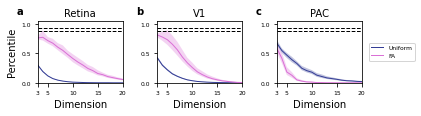

In [57]:
fig = plt.figure(figsize=(6, 1.5))

le = .1
re = .15
be = .275
te = .15
hg = .08
h = 1. - te - be
w = (1. - le - re - 2*hg) / 3.
axes = np.empty(3, dtype=object)
axes[:] = [fig.add_axes([le + ii*(w + hg), be, w, h]) for ii in range(3)]

# Label adjustments
subplot_x = -0.18
subplot_y = 1.12
title_pad = 5
# Line settings
lw = 1
line_alpha = 0.8
# Fill settings
fill_alpha = 0.3
# Legend settings
handlelength = 0.3
handletextpad = 0.3
# 25%, 50%, and 75% of the [85, 95]% range
lower_q = 87.5
upper_q = 92.5
middle_q = 0.5 * (upper_q + lower_q)

# Enumerate over results
for idx, result in enumerate(results):
    # Iterate over null models
    for group, model, label in zip(percentile_groups, models, labels):
        # Calculate median and bounds for each null model
        percentiles = result[group][:]
        lower, middle, upper = np.percentile(percentiles, q=[lower_q, middle_q, upper_q], axis=1)

        axes[idx].plot(
            dims,
            middle,
            linewidth=lw,
            color=colors[model],
            label=label)

        axes[idx].fill_between(
            x=dims,
            y1=lower,
            y2=upper,
            color=colors[model],
            alpha=fill_alpha,
            ec='none')
    axes[idx].axhline(lower_q / 100, linestyle='--', color='k', lw=lw)
    axes[idx].axhline(upper_q / 100, linestyle='--', color='k', lw=lw)

for idx, ax in enumerate(axes):
    ax.set_xlim([3, 20])
    ax.set_ylim([0, 1.05])
    ax.set_xticks([3, 5, 10, 15, 20])
    ax.set_yticks([0, .5, 1])
    ax.tick_params(labelsize=tick_label_size)
    
    ax.set_xlabel('Dimension', fontsize=ax_label_size)
    ax.set_title(titles[idx], fontsize=ax_label_size, pad=title_pad)
    
axes[0].set_ylabel('Percentile', fontsize=ax_label_size)
axes[2].legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    prop={'size': legend_size})

y = .91
lets = ['a', 'b', 'c']
for ii, x in enumerate([le + ii*(w + hg) - .05 for ii in range(3)]):
    fig.text(x, y, lets[ii], size=letter_size, fontweight='bold')


plt.savefig('figure5.pdf', dpi=300)
plt.savefig('figure5.jpg', dpi=300)